   system:index        lat        lon  month      ndvi  year  \
0  -98240,48790  40.090141 -88.250044      7  0.166935  2025   
1  -98239,48790  40.090141 -88.249146      7  0.136318  2025   
2  -98238,48790  40.090141 -88.248248      7  0.108838  2025   
3  -98237,48790  40.090141 -88.247349      7  0.046715  2025   
4  -98236,48790  40.090141 -88.246451      7  0.048378  2025   

                                     .geo  
0  {"type":"MultiPoint","coordinates":[]}  
1  {"type":"MultiPoint","coordinates":[]}  
2  {"type":"MultiPoint","coordinates":[]}  
3  {"type":"MultiPoint","coordinates":[]}  
4  {"type":"MultiPoint","coordinates":[]}  


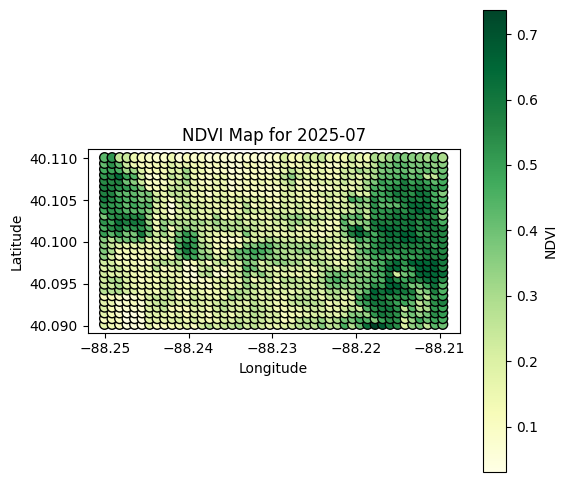

In [15]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

# Path to your monthly CSV file
csv_file = "uiuc_ndvi_2025_07.csv"

# Load CSV
df = pd.read_csv(csv_file)

# Quick check
print(df.head())

# Scatter plot: longitude vs latitude, colored by NDVI
plt.figure(figsize=(6,6))
sc = plt.scatter(df['lon'], df['lat'], c=df['ndvi'], cmap='YlGn', s=50, edgecolor='k')
plt.colorbar(sc, label='NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"NDVI Map for {df['year'][0]}-{df['month'][0]:02d}")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [16]:
import pandas as pd
import folium

# Load CSV
csv_file = "uiuc_ndvi_2025_07.csv"
df = pd.read_csv(csv_file)

# Approx grid size in degrees (~100m at 40° lat)
dx = 0.0009
dy = 0.0009

# Center map
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=16, tiles='cartodbpositron')

# Normalize NDVI for coloring
ndvi_min = df['ndvi'].min()
ndvi_max = df['ndvi'].max()

def ndvi_to_color(ndvi):
    if pd.isna(ndvi):
        return '#ffffff'
    green = int(255 * (ndvi - ndvi_min) / (ndvi_max - ndvi_min))
    return f'#00{green:02x}00'

# Add squares
for _, row in df.iterrows():
    lon = row['lon']
    lat = row['lat']
    color = ndvi_to_color(row['ndvi'])
    
    corners = [
        [lat - dy/2, lon - dx/2],
        [lat - dy/2, lon + dx/2],
        [lat + dy/2, lon + dx/2],
        [lat + dy/2, lon - dx/2]
    ]
    
    folium.Polygon(
        locations=corners,
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"NDVI: {row['ndvi']:.3f}" if pd.notna(row['ndvi']) else "NDVI: None"
    ).add_to(m)

m.save("ndvi_map.html")
print("Map saved to ndvi_map.html")


Map saved to ndvi_map.html


In [17]:
df_clean = df
print(df['ndvi'].describe())

count    1380.000000
mean        0.287137
std         0.162557
min         0.030466
25%         0.157192
50%         0.235895
75%         0.411486
max         0.736848
Name: ndvi, dtype: float64


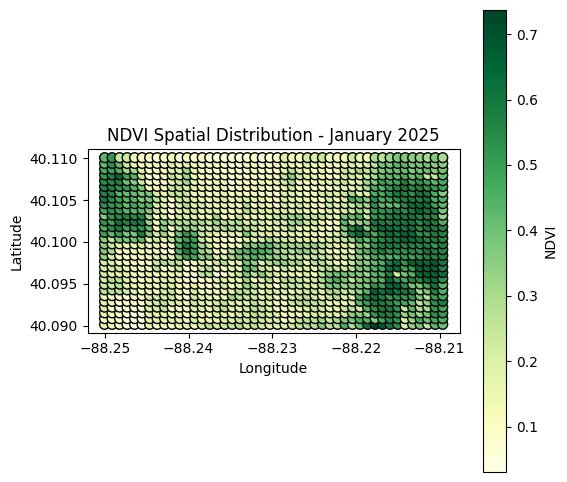

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(df_clean['lon'], df_clean['lat'], c=df_clean['ndvi'], cmap='YlGn', s=50, edgecolor='k')
plt.colorbar(label='NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NDVI Spatial Distribution - January 2025')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [19]:
max_ndvi = df_clean.loc[df_clean['ndvi'].idxmax()]
min_ndvi = df_clean.loc[df_clean['ndvi'].idxmin()]

print(f"Greenest cell at (lat, lon): ({max_ndvi['lat']:.6f}, {max_ndvi['lon']:.6f}), NDVI={max_ndvi['ndvi']:.3f}")
print(f"Least green cell at (lat, lon): ({min_ndvi['lat']:.6f}, {min_ndvi['lon']:.6f}), NDVI={min_ndvi['ndvi']:.3f}")


Greenest cell at (lat, lon): (40.090141, -88.217705), NDVI=0.737
Least green cell at (lat, lon): (40.090828, -88.247349), NDVI=0.030
